In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

In [32]:
url='https://raw.githubusercontent.com/aloctavodia/Statistical-Rethinking-with-Python-and-PyMC3/master/Data/Howell1.csv'
data = pd.read_csv(url, sep=';')

In [33]:
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


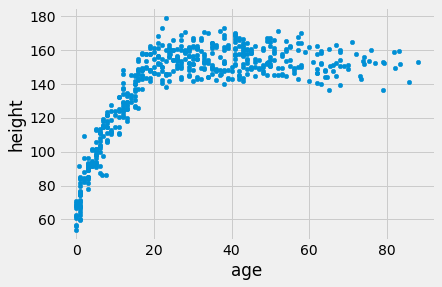

In [34]:
data.plot(x='age', y='height', kind='scatter')

C:\Users\ssj ALI\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


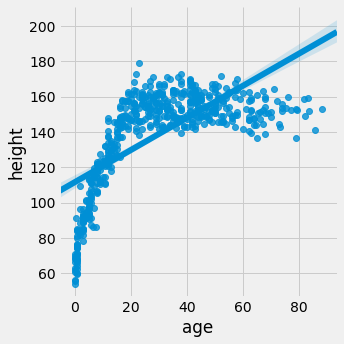

In [35]:
import seaborn as sns
sns.lmplot(x='age',y='height',data=data,fit_reg=True)

C:\Users\ssj ALI\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


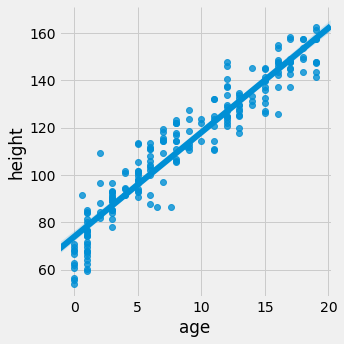

In [36]:
sns.lmplot(x='age',y='height',data=data[data.age < 20],fit_reg=True)

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

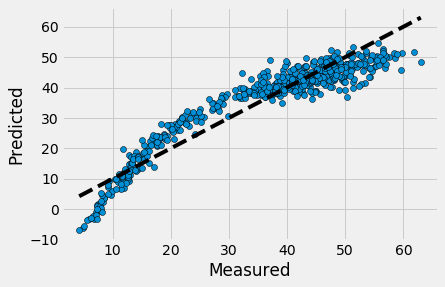

MEAN Squared Error : 25.275523699424365. (Lower the better)


In [38]:
lr = LinearRegression()
train = data.loc[:, data.columns != 'weight']
target = data.weight
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

cv=10 meaning: The cross-validation generator returns an iterable of length n_folds, each element of which is a 2-tuple of numpy 1-d arrays (train_index, test_index) containing the indices of the test and training sets for that cross-validation run.

So for 10-fold cross-validation, your custom cross-validation generator needs to contain 10 elements, each of which contains a tuple with two elements:

An array of the indices for the training subset for that run, covering 90% of your data
An array of the indices for the testing subset for that run, covering 10% of the data

In [39]:
data['age_less_than_20'] = (data.age<20).astype(int)

In [40]:
data.head()

,height,weight,age,male,age_less_than_20
0,151.765,47.825606,63.0,1,0
1,139.700,36.485807,63.0,0,0
2,136.525,31.864838,65.0,0,0
3,156.845,53.041915,41.0,1,0
4,145.415,41.276872,51.0,0,0


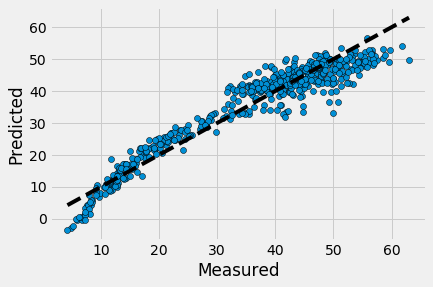

MEAN Squared Error : 18.426863053499034. (Lower the better)


In [41]:
lr = LinearRegression()
train = data.loc[:, data.columns != 'weight']
target = data.weight
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

In [42]:
data['squared_age'] = data['age'] ** 2

In [43]:
data['squared_height'] = data['height'] ** 2

In [44]:
data.head()

,height,weight,age,male,age_less_than_20,squared_age,squared_height
0,151.765,47.825606,63.0,1,0,3969.0,23032.615225
1,139.700,36.485807,63.0,0,0,3969.0,19516.090000
2,136.525,31.864838,65.0,0,0,4225.0,18639.075625
3,156.845,53.041915,41.0,1,0,1681.0,24600.354025
4,145.415,41.276872,51.0,0,0,2601.0,21145.522225


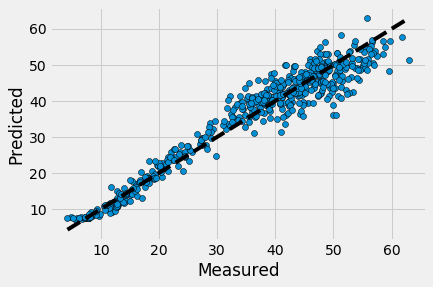

MEAN Squared Error : 13.478308708082018. (Lower the better)


In [45]:
lr = LinearRegression()
train = data.loc[:, data.columns != 'weight']
target = data.weight
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
error = mean_squared_error(target, predicted)
print("MEAN Squared Error : {}. (Lower the better)".format(error))

As the number of features increases, the accuracy also increases. But increasing number of features complicates the model.